In [1]:
import numpy as np
import scipy
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF, monotone_fn_inverter
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123456789)

In [3]:
n = 10000
X = stats.lognorm(s=0.95)
x = X.rvs(10000)
xr = np.round(x, decimals=2)
xl = np.linspace(x.min(), x.max(),501)
pl = np.linspace(0, 1, 1001)

(0.0, 10.0)

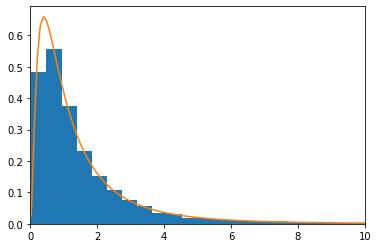

In [4]:
fig, axe = plt.subplots()
c = axe.hist(xr, bins=100, density=1)
axe.plot(xl, X.pdf(xl))
axe.set_xlim([0, 10])

In [5]:
xecdf = ECDF(xr)

In [6]:
xecdf.x

array([     -inf, 4.000e-02, 4.000e-02, ..., 3.059e+01, 3.577e+01,
       4.499e+01])

In [7]:
xecdf.x[:200]

array([-inf, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
       0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
       0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08,
       0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09,
       0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.11, 0.11, 0.11, 0.11,
       0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11,
       0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12,
       0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12,
       0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12,
       0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.

In [8]:
xecdf.y

array([0.000e+00, 1.000e-04, 2.000e-04, ..., 9.998e-01, 9.999e-01,
       1.000e+00])

In [9]:
xhist = np.histogram(xr, bins=100)
xdist = stats.rv_histogram(xhist)
xinv = xdist.ppf(pl)

In [10]:
xecdf_inv = monotone_fn_inverter(xecdf, xl)

In [11]:
eps = np.finfo(np.float).eps

In [12]:
plr = np.linspace(0.001, 0.999, 999)
xlr = xecdf_inv(plr)
plr

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128,

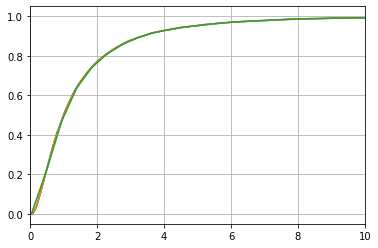

In [13]:
fig, axe = plt.subplots()
axe.plot(xecdf.x, xecdf.y)
axe.plot(xlr, plr)
axe.plot(xinv, pl)
axe.set_xlim([0, 10])
axe.grid()

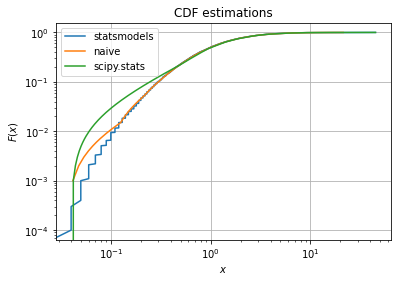

In [23]:
fig, axe = plt.subplots()
axe.loglog(xecdf.x, xecdf.y, label="statsmodels")
axe.plot(xlr, plr, label="naive")
axe.plot(xinv, pl, label="scipy.stats")
axe.set_title("CDF estimations")
axe.set_xlabel("$x$")
axe.set_ylabel("$F(x)$")
axe.legend()
axe.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


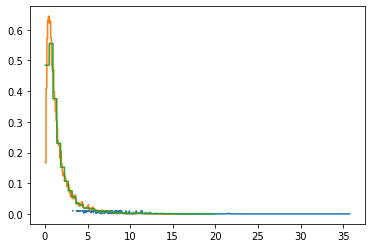

In [15]:
fig, axe = plt.subplots()
axe.plot(xecdf.x[:-1], np.diff(xecdf.y)/np.diff(xecdf.x))
axe.plot(xlr[:-1], np.diff(plr)/np.diff(xlr))
axe.plot(xinv[:-1], np.diff(pl)/np.diff(xinv))

(0.0, 10.0)

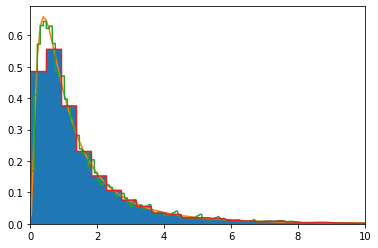

In [16]:
fig, axe = plt.subplots()
c = axe.hist(xr, bins=100, density=1)
axe.plot(xl, X.pdf(xl))
axe.plot(xlr[:-1], np.diff(plr)/np.diff(xlr))
axe.plot(xinv[:-1], np.diff(pl)/np.diff(xinv))
axe.set_xlim([0, 10])

In [17]:
c, b = np.histogram(xr, density=1.)
c, b

(array([2.09899889e-01, 1.03225806e-02, 1.57953281e-03, 3.33704116e-04,
        2.00222469e-04, 6.67408231e-05, 2.22469410e-05, 2.22469410e-05,
        0.00000000e+00, 2.22469410e-05]),
 array([4.0000e-02, 4.5350e+00, 9.0300e+00, 1.3525e+01, 1.8020e+01,
        2.2515e+01, 2.7010e+01, 3.1505e+01, 3.6000e+01, 4.0495e+01,
        4.4990e+01]))

In [18]:
xs = np.sort(xr)
px = np.linspace(0, 1, xs.size)
ecdf = scipy.interpolate.interp1d(xs, px, kind='linear')

In [19]:
xl = np.linspace(min(xs), max(xs), 500)
pxl = ecdf(xl)

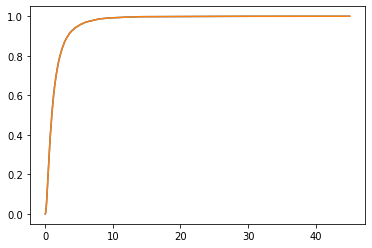

In [20]:
fig, axe = plt.subplots()
axe.plot(xs, px)
axe.plot(xl, pxl)

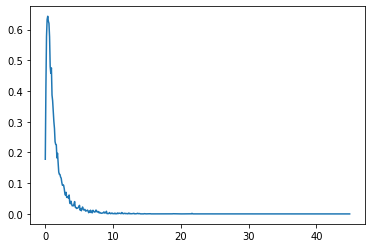

In [21]:
fig, axe = plt.subplots()
axe.plot(xl[:-1], np.diff(pxl)/np.diff(xl))